<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/HOML_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#MNIST data set
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#1
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
param_grid = [{'weights': ["distance"], 'n_neighbors': [4]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=2, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] n_neighbors=4, weights=distance .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. n_neighbors=4, weights=distance, total=18.1min
[CV] n_neighbors=4, weights=distance .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 18.1min remaining:    0.0s


[CV] .................. n_neighbors=4, weights=distance, total=18.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 36.1min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score
print(grid_search.best_params_)
print(accuracy_score(y_test, grid_search.predict(X_test)))

{'n_neighbors': 4, 'weights': 'distance'}
0.9731428571428572


In [ ]:
#2
import numpy as np
from scipy.ndimage.interpolation import shift

#이미지 이동
def shift_image(image, dx=0, dy=0, shift1=False):
    image = image.reshape((28, 28))
    if shift1:
        shifted_image = []
        for dx, dy in ((1,0), (0,1), (-1,0), (0,-1)):
            shifted_image.append(shift(image, [dy, dx], cval=0, mode='constant').reshape([-1]))
        return shifted_image

    shifted_image_down = shift(image, [dy, dx], cval=0, mode='constant')
    return shifted_image_down.reshape([-1])

#데이터 복사
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

#이동 이미지 데이터 추가
for image, label in zip(X_train, y_train):
    for shifted_image in shift_image(image, shift1=True):
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(label)

#numpy 배열 변환
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

#셔플
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:

knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)
print(accuracy_score(y_test, knn_clf.predict(X_test)))

In [37]:
#3
import os
TITANIC_PATH = os.path.join('drive', 'MyDrive', 'Datasets', 'kaggle', 'titanic')

import pandas as pd

train_data = pd.read_csv(os.path.join(TITANIC_PATH, 'train.csv'))
test_data = pd.read_csv(os.path.join(TITANIC_PATH, 'test.csv'))

* Survived: 타깃입니다. 0은 생존하지 못한 것이고 1은 생존을 의미합니다.
* Pclass: 승객 등급. 1, 2, 3등석.
* Name, Sex, Age: 이름 그대로 의미입니다.
* SibSp: 함께 탑승한 형제, 배우자의 수.
* Parch: 함께 탑승한 자녀, 부모의 수.
* Ticket: 티켓 아이디
* Fare: 티켓 요금 (파운드)
* Cabin: 객실 번호
* Embarked: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [41]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [42]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [43]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [63]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
num_pipeline = Pipeline([
        #("select_numeric", DataFrameSelector(num_attribs)),
        ("imputer", SimpleImputer(strategy="median")),
    ])

#num_pipeline.fit_transform(X_train)

In [64]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

cat_attribs = ["Pclass", "Sex", "Embarked"]
cat_pipeline = Pipeline([
        #("select_cat", DataFrameSelector(cat_attribs)),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

#cat_pipeline.fit_transform(X_train)

In [65]:
full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_pipeline", cat_pipeline, cat_attribs),
    ])

X_train = full_pipeline.fit_transform(train_data)
print(X_train)

[[22.  1.  0. ...  0.  0.  1.]
 [38.  1.  0. ...  1.  0.  0.]
 [26.  0.  0. ...  0.  0.  1.]
 ...
 [28.  1.  2. ...  0.  0.  1.]
 [26.  0.  0. ...  1.  0.  0.]
 [32.  0.  0. ...  0.  1.  0.]]


In [48]:
y_train = train_data["Survived"]

In [49]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
X_test = full_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

In [51]:
from sklearn.model_selection import cross_val_score
#10겹 교차검증
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7329588014981274

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

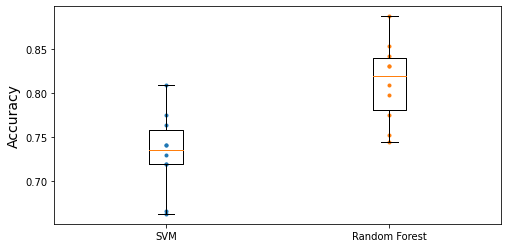

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
#10개의 mse 측정값
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")

plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [60]:
#특성 공학

#나이를 수치형에서 범주형으로 변경
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [61]:
#부모, 배우자, 형재 자매의 수를 하나의 특성으로
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [70]:
num_attribs = ['RelativesOnboard' , "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked", 'AgeBucket']

full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_pipeline", cat_pipeline, cat_attribs),
    ])

X_train = full_pipeline.fit_transform(train_data)

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8115106117353308